# Exercises - Digits ✍️

As you already know from now, MNIST Digits dataset is one the most used kind of dataset for hands-on data science training.

Back in the 90's, some great algorithms were designed on this kind dataset, like the famous LeNet-5.

Today we will use it to do PCA, t-SNE as well as classification!

---

![](https://images.unsplash.com/photo-1471107340929-a87cd0f5b5f3?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&w=1000&q=80)

**Q1.** Add here all the libraries needed along the exercise.

In [59]:
# TODO: Import the needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


**Q2.** Now we will load the MNIST dataset. You can find it in scikit learn, using `datasets.load_digits()`

Just as we did for the Iris dataset, split the features part in ``X`` and the target part in `y`.

In [5]:
# TODO: load the MNIST dataset and split it into X and y
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

**Q3.** Play with the dataset a bit: what is the shape of the data? How many samples are there? What kind of data is this? What is the range of the feature values? How many classes are there?

In [6]:
digits.images.shape

(1797, 8, 8)

In [7]:
# Accessing one image
image_0 = digits.images[0]
image_0.shape

(8, 8)

In [8]:
image_0

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

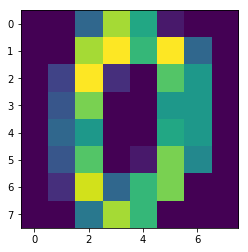

In [9]:
#Visualize
plt.imshow(image_0)

In [10]:
digits.data.shape

(1797, 64)

In [11]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [12]:
image_0

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [13]:
len(digits.feature_names)

64

In [14]:
X = digits.data
y = digits.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [18]:
digit_data = pd.DataFrame(X, columns = digits.feature_names)

In [19]:
digit_data["target"] = digits.target
digit_data.head

<bound method NDFrame.head of       pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0        0.0        5.0       13.0        9.0        1.0   
1           0.0        0.0        0.0       12.0       13.0        5.0   
2           0.0        0.0        0.0        4.0       15.0       12.0   
3           0.0        0.0        7.0       15.0       13.0        1.0   
4           0.0        0.0        0.0        1.0       11.0        0.0   
5           0.0        0.0       12.0       10.0        0.0        0.0   
6           0.0        0.0        0.0       12.0       13.0        0.0   
7           0.0        0.0        7.0        8.0       13.0       16.0   
8           0.0        0.0        9.0       14.0        8.0        1.0   
9           0.0        0.0       11.0       12.0        0.0        0.0   
10          0.0        0.0        1.0        9.0       15.0       11.0   
11          0.0        0.0        0.0        0.0       14.0       13.0   
12      

**Q4.** Display a random digit image 

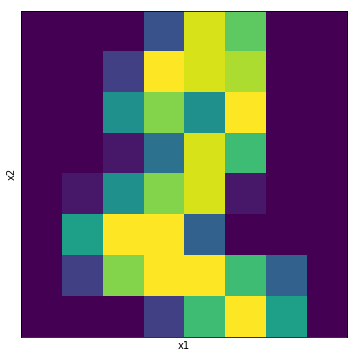

In [20]:
# TODO: reshape a sample and use imshow to display the digit image
X2D= X[2,:].reshape(8,8)
from matplotlib import pyplot as plt
plt.figure(2, figsize=(6, 6))
plt.imshow(X2D)

# Format chart
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks(())
plt.yticks(())
plt.show()

**Q5.** Let's reduce the dimensionality of our data by applying PCA to our data.

What is the initial size of the data?

Apply PCA to project your data on 2 dimensions and then display the result.

> ⚠️**Warning**: Make sure to scale your features before applying PCA

In [21]:
# TODO: Perform PCA on the data with 2 retained dimensions (after mean normalization)
# Instanciate the PCA algorithm
pca = PCA(n_components=2)

# first we perform mean normalization
X_norm = X - X.mean(axis = 0)

# Execute PCA on the normalized data
pca_data = pca.fit_transform(X_norm)
pca_data

array([[ -1.25946807,  21.27489099],
       [  7.95761631, -20.76870145],
       [  6.99192547,  -9.9559973 ],
       ...,
       [ 10.80128033,  -6.96024505],
       [ -4.87207914,  12.42392677],
       [ -0.344398  ,   6.36555707]])

In [22]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

**Q6.** Display the results, with different colors per label, on a 2D plot.

In [23]:
# TODO: Display the results of the PCA
pca_data[:,0]
pca_data[:,-1]

array([ 21.27489099, -20.76870145,  -9.9559973 , ...,  -6.96024505,
        12.42392677,   6.36555707])

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


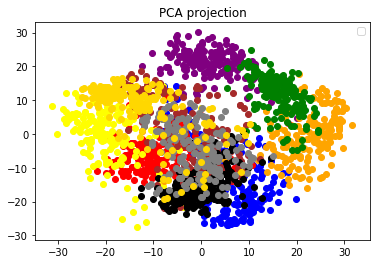

In [24]:
colors = ["purple", "blue", "red", "yellow", "orange", "brown", "green", "black", "grey", "gold"]

for digit, color in zip(range(0,10), colors):
    plt.scatter(pca_data[y == digit,0], pca_data[y == digit,1], c = color)
    plt.legend(loc=0)
    plt.title('PCA projection')
  #  plt.show()

**Q6.** Quite a pretty plot, right? Inteprete it. Especially, what do you think about the 2 new dimensions created?

Compute the retained variance.

### This was a pretty dope PCA. We got our different digit clusters quite well delimitated; thus, the two components were descriptive of the data

In [43]:
# TODO: Interpretation and retained variance
print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)

[0.14890594 0.13618771]


0.28509364823668326

**Q7.** What do you think of the retained variance?

How many dimensions would you choose in order that they explain at least 99% of the variance?

In [44]:
# TODO: Get the number of dimensions to keep to have at least 90% of retained variance
# Instanciate the PCA algorithm
pca2 = PCA(n_components = 0.9)

# first we perform mean normalization
X_norm = X - X.mean(axis = 0)

# Execute PCA on the normalized data
pca_data_2 = pca2.fit_transform(X_norm)
pca_data_2.shape

(1797, 21)

We will need 21 attributs at least in order to retain 90% of the variance

In [45]:
print(pca2.explained_variance_ratio_)
sum(pca2.explained_variance_ratio_)

[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078806 0.02372341 0.02272697
 0.01821863 0.01773855 0.01467101 0.01409716 0.01318589 0.01248138
 0.01017718 0.00905617 0.00889538]


0.9031985012037212

**Q8.** Let's now try to use the output of our PCA in order to solve a classification problem.

Before doing anything, think carefully about what algorithms you know, and which one can be used to do such a classification task. Then how would you proceed? What steps do you need to perform?

We will perform the same classification on the raw data (meaning without PCA) and on the reduced data after PCA (with 99% variance retained) - and compare results.

For both raw and PCA data, split your data into 80% for training and 20% for testing. 

In [46]:
# TODO: Split the data into train and test
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(pca_data_2, y, test_size = .2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [47]:
#Testing new print style :)
print("X_train_p =",  X_train_p.shape, "\n"
     "X_test_p =" , X_test_p.shape, "\n"
     "y_train_p =" , y_train_p.shape, "\n"
     "y_test_p =" , y_test_p.shape, "\n"
     "X_train =" , X_train.shape, "\n"
     "X_test =" , X_test.shape, "\n"
     "y_train =" , y_train.shape, "\n"
     "y_test =" , y_test.shape, "\n")

X_train_p = (1437, 21) 
X_test_p = (360, 21) 
y_train_p = (1437,) 
y_test_p = (360,) 
X_train = (1437, 64) 
X_test = (360, 64) 
y_train = (1437,) 
y_test = (360,) 



**Q9.** Train a simple logistic regression separately on both data (with and without PCA).

Evaluate your results and compare predictions accuracy.

> 🔦 **Hint**: you can use the option `multiclass='multinomial'` of the scikit-learn logistic regression for this multiclass problem, have a look at the documentation

In [48]:
lr = LogisticRegression()

In [49]:
lr.fit(X_train, y_train)

/Users/digitalisdiana/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [50]:
lr_pca = LogisticRegression()
lr_pca.fit(X_train_p, y_train)

LogisticRegression()

# I have a question here about data matching and shape.

In [51]:
# TODO: Perform classification using a logistic regression on data with and without PCA
lr_pca.score(X_train_p, y_train)

0.16144745998608212

In [52]:
y_pred = lr_pca.predict(X_test_p)
accuracy_score(y_pred, y_test_p)

0.12777777777777777

In [53]:
# TODO: Compute and compare accuracies
X_test

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  2., 10., ...,  0.,  0.,  0.],
       [ 0.,  0.,  7., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  5., ..., 12.,  3.,  0.],
       [ 0.,  0.,  3., ..., 16.,  2.,  0.]])

**Q10.** Do you observe an improvement using the PCA?

Let's try to do the same thing with t-SNE.

First, perform t-SNE on the original data with only 2 kept dimensions, and display the result in a plot.

In [55]:
# TODO: Perform t-SNE on the original data and visualize the result 
tsne = TSNE(n_components=2)

In [57]:
X_tsne = tsne.fit_transform(X)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


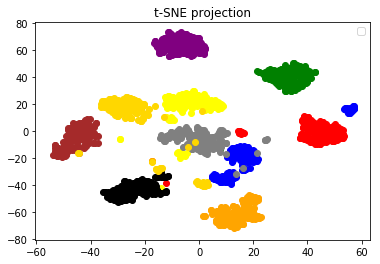

In [58]:
colors = ["purple", "blue", "red", "yellow", "orange", "brown", "green", "black", "grey", "gold"]

for digit, color in zip(range(0,10), colors):
    plt.scatter(X_tsne[y == digit,0], X_tsne[y == digit,1], c = color)
    plt.legend(loc=0)
    plt.title('t-SNE projection')

**Q11.** Impressive results, right? Now train a Logisitic Regression to perform classification using a on this data and compare with previous reuslts. 

You know how to do, right? Scale the data, split it (train: 80%, test: 20%), and perform the classifications with same parameters as before. Finally show the accuracy.

In [70]:
# TODO: Perform the classification on the t-SNE data and display the accuracy
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_tsne, y, test_size = .2)

In [71]:
lr_tSNE = LogisticRegression()
lr_tSNE.fit(X_train_t, y_train)

LogisticRegression()

In [72]:
lr_tSNE.score(X_train_t, y_train)
y_pred_2 = lr_tSNE.predict(X_test_t)
accuracy_score(y_pred, y_test_t)

0.09722222222222222

**Q12**. What do you think of the accuracy? Do you have any ideas in order to improve your score? Try it!

# Terrible Accuracy; will definitely improve with more numbers of training. For now, however... let's move on. 